In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [2]:
mnist = input_data.read_data_sets('MnistDataSet', one_hot=True)

Extracting MnistDataSet/train-images-idx3-ubyte.gz
Extracting MnistDataSet/train-labels-idx1-ubyte.gz
Extracting MnistDataSet/t10k-images-idx3-ubyte.gz
Extracting MnistDataSet/t10k-labels-idx1-ubyte.gz


In [3]:
print('train images     :', mnist.train.images.shape, 'labels:', mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape, ' labels:', mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape, 'labels:', mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


In [4]:
def layer(input_dim, output_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [5]:
#輸入層
x = tf.placeholder('float', [None, 784])

In [6]:
#隱藏層
h = layer(input_dim=784, output_dim=256, inputs=x, activation=tf.nn.relu)

In [7]:
#輸出層
y_predict = layer(input_dim=256, output_dim=10, inputs=h, activation=None)

In [8]:
#真實輸出值
y_label = tf.placeholder('float', [None, 10])

In [9]:
#損失函數(loss function)，計算預測值與真實值之間的差異。
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

In [10]:
#最優化方法(optimizer)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [14]:
#計算每一筆資料是否預測正確，回傳一個預測陣列，正確傳回1，錯誤傳回0
correct_prediction = tf.equal(tf.arg_max(y_label, 1), tf.arg_max(y_predict, 1))

In [15]:
#計算準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [16]:
#訓練參數
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples / batchSize)
epoch_list = []; loss_list = []; accuracy_list = [];
from time import time
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_label:batch_y})
        
    loss, acc = sess.run([loss_function, accuracy], 
                         feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    
    print('Train Epoch:', '%02d'%(epoch+1), 'Loss:', '{:.9f}'.format(loss), 'Accuracy:', acc)

print('Train Finished Takes:', time() - startTime)

Train Epoch: 01 Loss: 5.672605038 Accuracy: 0.8496
Train Epoch: 02 Loss: 3.624946833 Accuracy: 0.8978
Train Epoch: 03 Loss: 2.795418262 Accuracy: 0.9126
Train Epoch: 04 Loss: 2.346603155 Accuracy: 0.9188
Train Epoch: 05 Loss: 2.049530268 Accuracy: 0.9282
Train Epoch: 06 Loss: 1.854862452 Accuracy: 0.9332
Train Epoch: 07 Loss: 1.666495323 Accuracy: 0.9368
Train Epoch: 08 Loss: 1.541820884 Accuracy: 0.9418
Train Epoch: 09 Loss: 1.496462584 Accuracy: 0.9424
Train Epoch: 10 Loss: 1.419491768 Accuracy: 0.9424
Train Epoch: 11 Loss: 1.382583737 Accuracy: 0.9452
Train Epoch: 12 Loss: 1.332402349 Accuracy: 0.9466
Train Epoch: 13 Loss: 1.274574041 Accuracy: 0.949
Train Epoch: 14 Loss: 1.286629319 Accuracy: 0.949
Train Epoch: 15 Loss: 1.247757435 Accuracy: 0.9516
Train Finished Takes: 1097.058086156845


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

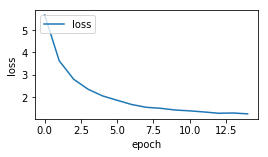

In [30]:
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, loss_list, label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss'], loc='upper left')
plt.show()

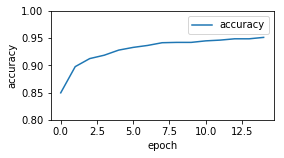

In [29]:
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, accuracy_list, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0.8, 1)
plt.legend()
plt.show()

In [31]:
#使用測試資料，評估模型準確率
print('Accuracy:', sess.run(accuracy, feed_dict={x:mnist.test.images, 
                                                 y_label:mnist.test.labels}))

Accuracy: 0.9493
